# Pymaceuticals Inc.
---

### Analysis
 
 - 
 As the weight of the mouse increases the tumor volume also increases(supported by the correlation coeffient of 0.84).
 
 Capomulin and Ramicane seem to be the more effective treatments as their mean tumor size is lower than the rest of the treatments. (May also be supported by the fact that Capomulin and Ramicane were used more as treatments compared to other drugs and results of Mouse 1509).
 
 A limitation may be that the number of treatments weren't destributed evenly and all outliers weren't identified.
 
 The near 50/50 gender split kept the data more accurrate however gender wasn't tested. 
 

 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how = 'left', on = ['Mouse ID'])

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice = len(combined_df['Mouse ID'].unique())
unique_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df[combined_df.duplicated()]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
vari = drug_regimen['Tumor Volume (mm3)'].var()
standard_d = drug_regimen['Tumor Volume (mm3)'].std()
SEM = drug_regimen['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame(({'Mean Tumor Volume (mm3)': mean,
                                  'Median Tumor Volume (mm3)': median,
                                  'Tumor Volume Variance': vari,
                                  'Tumor Volume Std Dev': standard_d,
                                  'Tumor Volume SEM': SEM}))
summary_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
vari = drug_regimen['Tumor Volume (mm3)'].var()
standard_d = drug_regimen['Tumor Volume (mm3)'].std()
SEM = drug_regimen['Tumor Volume (mm3)'].sem()
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate=clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean",
                                                                                       "median",
                                                                                       "var",
                                                                                       "std",
                                                                                       "sem"]})
renamed_summary_aggregate = summary_aggregate.rename(columns={"mean":"Total Mean", 
                                                              "median": "Total Median", 
                                                              "var": "Variance", 
                                                              "std": "Standard Deviation", 
                                                              "sem": "SEM"})

renamed_summary_aggregate

Tumor Volume (mm3)                                             \
                     Total Mean Total Median   Variance Standard Deviation   
Drug Regimen                                                                 
Capomulin             40.675741    41.557809  24.947764           4.994774   
Ceftamin              52.591172    51.776157  39.290177           6.268188   
Infubinol             52.884795    51.820584  43.128684           6.567243   
Ketapril              55.235638    53.698743  68.553577           8.279709   
Naftisol              54.331565    52.509285  66.173479           8.134708   
Placebo               54.033581    52.288934  61.168083           7.821003   
Propriva              52.320930    50.446266  43.852013           6.622085   
Ramicane              40.216745    40.673236  23.486704           4.846308   
Stelasyn              54.233149    52.431737  59.450562           7.710419   
Zoniferol             53.236507    51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

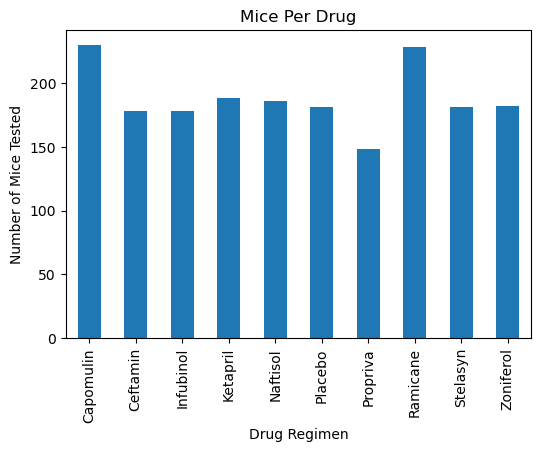

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

bar_plot=mice_bar.plot(kind="bar",figsize=(6,4))
plt.title("Mice Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

plt.tight_layout()

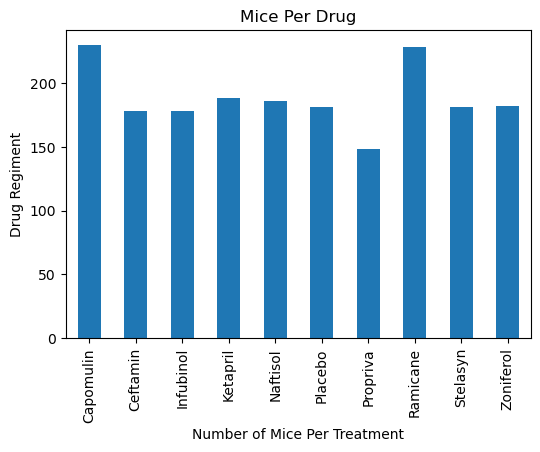

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(mice_bar))
y_axis=(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count())

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_bar.index.values,rotation="vertical")

plt.bar = mice_bar.plot(kind="bar",figsize=(6,4)) 
plt.title("Mice Per Drug")
plt.xlabel("Number of Mice Per Treatment")
plt.ylabel("Drug Regiment")
plt.show()


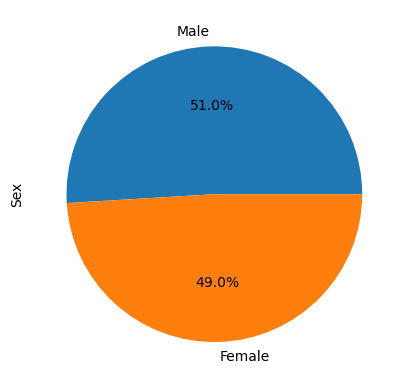

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = clean_df["Sex"].value_counts()
gender_pie.plot(kind="pie",autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
timepoint = timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
volume_df_final= timepoint.merge(clean_df, on=(["Mouse ID","Timepoint"]), how = "left")
volume_df_final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_rows = volume_df_final.loc[volume_df_final["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset 
    subset = tumor_vol.append(final_rows)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_rows.loc[(final_rows < lower_bound) | (final_rows > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


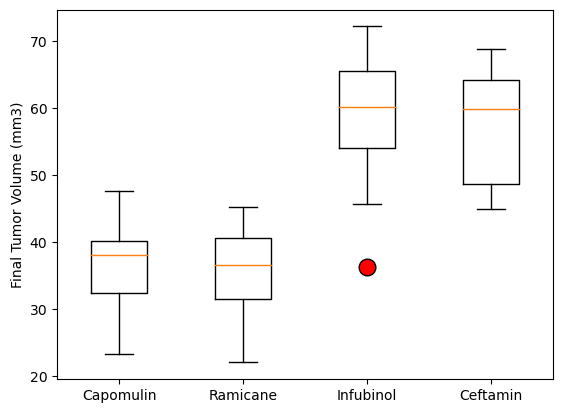

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol, labels = treatments, flierprops=box_plot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

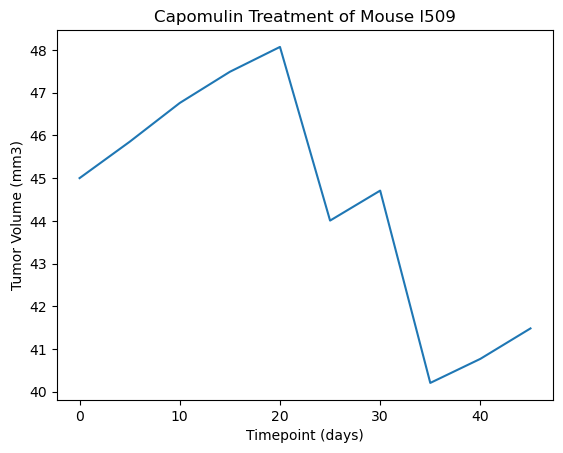

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_1509 = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
xaxis = mouse_1509["Timepoint"] 
yaxis = mouse_1509["Tumor Volume (mm3)"] 
mouse_1509 = plt.plot(xaxis, yaxis)

plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

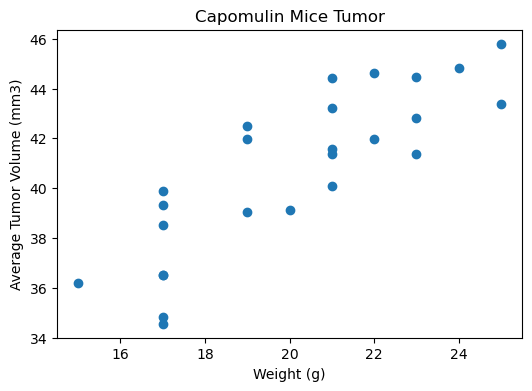

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = pd.DataFrame(clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:])

capomulin_mouse = capomulin_df.groupby(["Mouse ID"])

avg_tumor_capomulin = capomulin_mouse["Tumor Volume (mm3)"].mean()

avg_weight_capomulin = capomulin_mouse["Weight (g)"].mean()

df_capomulin_average = pd.DataFrame({"Avg. Tumor": avg_tumor_capomulin, "Avg. Weight": avg_weight_capomulin})

x = avg_weight_capomulin
y = avg_tumor_capomulin

plt.figure(figsize = (6,4))
plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Mice Tumor")

plt.show()

## Correlation and Regression

 The corrlation coefficient between weight and average tumor volume on the Capomulin regimen is 0.84.


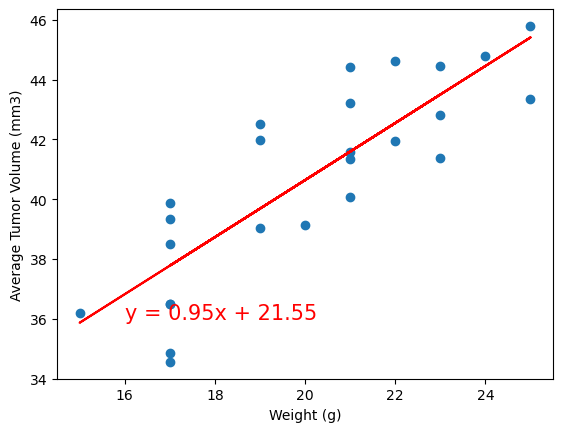

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x,y)

print(f" The corrlation coefficient between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)

regression_equation = x * slope + intercept

line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regression_equation, "r-")
plt.annotate(line,(16,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()